<a href="https://colab.research.google.com/github/athulatk/Major_Project_Smartknower/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Importing necessary libraries and requirements
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
from keras.preprocessing import image
from tensorflow.keras import models,layers
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [41]:
#Data Gathering and Preprocessing

# Define data path
data_path = '/content/drive/MyDrive/Fruit_dataset_1'    #Path of the dataset
categories=['fresh apple','fresh banana','rotten apple','rotten banana']
data_dir_list = os.listdir(data_path)

target=[]
img_data_list=[]

for category in categories: 
	class_num=categories.index(category)
	path=os.path.join(data_path,category)
	print(path)
	for img in os.listdir(path):
		image_arr=image.load_img(os.path.join(path,img),target_size=(224,224))
		x = image.img_to_array(image_arr)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		#print('Input image shape:', x.shape)
		img_data_list.append(x)
		target.append(class_num)

/content/drive/MyDrive/Fruit_dataset_1/fresh apple
/content/drive/MyDrive/Fruit_dataset_1/fresh banana
/content/drive/MyDrive/Fruit_dataset_1/rotten apple
/content/drive/MyDrive/Fruit_dataset_1/rotten banana


In [42]:
img_data = np.array(img_data_list)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]
print(img_data.shape)

(1161, 224, 224, 3)


In [43]:
target=np.array(target)
len(target)

1161

In [44]:
#Shuffle the dataset
x,y = shuffle(img_data,target, random_state=42)

In [45]:
#Splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
#Loading VGG16 model
vgg_model = VGG16(include_top=False,weights='imagenet',classes=4,input_shape=(224,224,3))

#View the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [47]:
#Freezing the vgg16 layers
for layer in vgg_model.layers:
  layer.trainable = False

In [53]:
#Adding extra layers and creating a custom model
new_layer = Flatten()(vgg_model.output) #Flatten layer
dense_1=Dense(256,activation='relu')(new_layer) #Dense layer
dense_2=Dense(256,activation='relu')(dense_1) #Dense layer
prediction = Dense(4, activation='softmax')(dense_2) #Output dense layer

custom_model = Model(inputs=vgg_model.input, outputs=prediction)

#View the structure of the custom model
custom_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


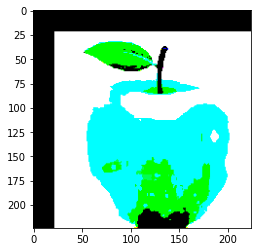

In [86]:
plt.imshow(x_test[101])

In [87]:
categories[y_test[101]]

'fresh apple'

In [56]:
custom_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
hist = custom_model.fit(x_train, y_train,epochs=5)

Epoch 1/5
26/26 [==============================] - 391s 15s/step - loss: 4.5911 - accuracy: 0.8436
Epoch 2/5
26/26 [==============================] - 392s 15s/step - loss: 0.2967 - accuracy: 0.9914
Epoch 3/5
26/26 [==============================] - 389s 15s/step - loss: 0.3815 - accuracy: 0.9889
Epoch 4/5
26/26 [==============================] - 391s 15s/step - loss: 0.5010 - accuracy: 0.9852
Epoch 5/5
26/26 [==============================] - 391s 15s/step - loss: 0.0888 - accuracy: 0.9975


In [58]:
#Model evaluation
(loss, accuracy) = custom_model.evaluate(x_test, y_test, batch_size=10, verbose=1)

35/35 [==============================] - 170s 5s/step - loss: 0.5731 - accuracy: 0.9742


Predicted output:  rotten apple


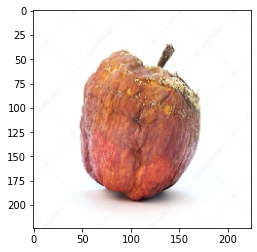

In [60]:
#Prediction of unseen data
from keras.preprocessing import image
img=image.load_img('/content/apz.jpg',target_size=(224,224))
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)

output=custom_model.predict(img)
index=np.argmax(output)
print("Predicted output: ",categories[index])

Predicted output:  fresh banana


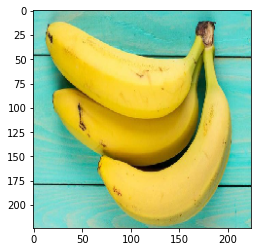

In [61]:
img=image.load_img('/content/bananas-bunch.jpg',target_size=(224,224))
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)

output=custom_model.predict(img)
index=np.argmax(output)
print("Predicted output: ",categories[index])

In [62]:
#Saving the model
custom_model.save('fruit_model.h5')

In [63]:
#Loading the model
from keras.models import load_model
saved_model=load_model("fruit_model.h5")

Predicted output:  rotten banana


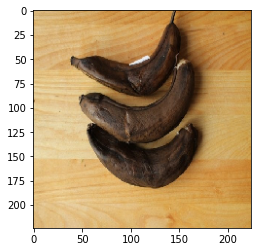

In [91]:
#Prediction using saved model
img=image.load_img('/content/rot_banana.jpg',target_size=(224,224))
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)

output=saved_model.predict(img)
index=np.argmax(output)
print("Predicted output: ",categories[index])